<a href="https://colab.research.google.com/github/slarkdev/AnomaliesDetection/blob/main/anomaly_detection_informer_lesly_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --ignore-installed --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
path = './drive/MyDrive/3w_dataset_anomalias_agrupadas/combinado_A02.csv'
TimeSeries = pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')
#TimeSeries = pd.read_csv(path, parse_dates=['timestamp'])

In [ ]:
TimeSeries

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2013-11-04 01:41:01,0.0,18852350.0,116.77820,9599435.0,173.0961,2902859.0,NaN,0.0,0.0
2013-11-04 01:41:02,0.0,18852350.0,116.77810,9599434.0,173.0961,2902867.0,NaN,0.0,0.0
2013-11-04 01:41:03,0.0,18852350.0,116.77800,9599432.0,173.0961,2902875.0,NaN,0.0,0.0
2013-11-04 01:41:04,0.0,18852350.0,116.77790,9599431.0,173.0961,2902882.0,NaN,0.0,0.0
2013-11-04 01:41:05,0.0,18852350.0,116.77790,9599429.0,173.0961,2902890.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-02-06 19:53:56,34377850.0,4861702.0,11.52894,722341.6,NaN,NaN,NaN,NaN,2.0
2018-02-06 19:53:57,34377970.0,4861656.0,11.52728,722606.7,NaN,NaN,NaN,NaN,2.0
2018-02-06 19:53:58,34377990.0,4861609.0,11.52453,722871.8,NaN,NaN,NaN,NaN,2.0


In [ ]:
columns_names = TimeSeries.columns.values
columns_names

array(['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL',
       'T-JUS-CKGL', 'QGL', 'class'], dtype=object)

In [ ]:
# Definir las columnas de entrada y salida:
input_columns = ['P-PDG', 'P-TPT',	'T-TPT']
output_columns = ['class']

In [ ]:
TimeSeries['class'].value_counts()

,count
class,
102.0,88388
0.0,52651
2.0,16615


In [ ]:
X_train = train.iloc[:, :-1].values  # Extraer todas las columnas menos la última (features)
y_train = train.iloc[:, -1].values  # Última columna es el objetivo (predicción)

X_test = test.iloc[:, :-1].values  # Extraer todas las columnas menos la última (features)
y_test = test.iloc[:, -1].values  # Última columna es el objetivo (predicción)


In [ ]:
X_train

array([[0.        , 0.70961913, 0.99951932],
       [0.        , 0.70961913, 0.99951844],
       [0.        , 0.70961913, 0.99951755],
       ...,
       [0.81846773, 0.60535864, 0.96585731],
       [0.8184636 , 0.6053616 , 0.96585115],
       [0.81845973, 0.60536506, 0.9658441 ]])

In [ ]:
y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(109926, 3)
(47112, 3)


In [ ]:
test = test.reset_index()  # 🔄 Convierte el índice en columna
train = train.reset_index()


test["timestamp"] = test["timestamp"].astype('int64') // 10**9  # 🔄 Convertir a segundos
train["timestamp"] = train["timestamp"].astype('int64') // 10**9


test["timestamp"].values

array([1416693690, 1416693691, 1416693692, ..., 1517946838, 1517946839,
       1517946840])

In [ ]:
import torch

# 🔥 Convertir datos en tensores
x_enc = torch.tensor(X_train, dtype=torch.float32)  # Datos de entrenamiento (codificador)

X_test = np.expand_dims(X_test, axis=-1)  # 🚀 Agregar dimensión de característ
x_dec = torch.tensor(X_test[:, -10:, :], dtype=torch.float32)  # Últimos 10 timesteps de prueba

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Target de entrenamiento

y_test = np.expand_dims(y_test, axis=-1)  # 🚀 Agregar dimensión de característ
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)  # Target de prueba

# 🔥 Marcadores temporales (si existen, si no, usar ceros)
x_mark_enc = torch.tensor(train["timestamp"].values, dtype=torch.float32).unsqueeze(-1)
x_mark_dec = torch.tensor(test["timestamp"].values, dtype=torch.float32).unsqueeze(-1)

#x_mark_enc = torch.zeros_like(x_enc)t
#x_mark_dec = torch.zeros_like(x_dec)

print("Tensores creados correctamente 🚀")


Tensores creados correctamente 🚀


In [ ]:
print("Forma de x_enc:", x_enc.shape)
print("Forma de x_mark_enc:", x_mark_enc.shape)
print("Forma de x_dec:", x_dec.shape)
print("Forma de x_mark_dec:", x_mark_dec.shape)



Forma de x_enc: torch.Size([109926, 3])
Forma de x_mark_enc: torch.Size([109926, 1])
Forma de x_dec: torch.Size([47112, 3, 1])
Forma de x_mark_dec: torch.Size([47112, 1])


In [ ]:
!git clone https://github.com/zhouhaoyi/Informer2020.git


Cloning into 'Informer2020'...
remote: Enumerating objects: 579, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 579 (delta 0), reused 0 (delta 0), pack-reused 577 (from 2)
Receiving objects: 100% (579/579), 6.49 MiB | 15.63 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [ ]:
import os
os.chdir("/content/Informer2020")

In [ ]:
!ls /content/Informer2020/models


attn.py  decoder.py  embed.py  encoder.py  __init__.py	model.py


In [ ]:
from models.model import Informer


# 📌 Configuración del modelo Informer
modelo = Informer(
    enc_in=3,  # 🔥 Número de características en la entrada
    dec_in=3,
    c_out=3,
    seq_len=300,  # 🔄 Longitud de la serie de entrada
    label_len=10,
    out_len=10,
    d_model=64,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    dropout=0.1
)

In [ ]:
x_enc

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096,  ..., 0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995,  ..., 0.9995, 0.9995, 0.9995]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096,  ..., 0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995,  ..., 0.9995, 0.9995, 0.9995]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096,  ..., 0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995,  ..., 0.9995, 0.9995, 0.9995]],

        ...,

        [[0.8185, 0.8185, 0.8185,  ..., 0.8185, 0.8185, 0.8185],
         [0.6054, 0.6054, 0.6054,  ..., 0.6054, 0.6054, 0.6054],
         [0.9659, 0.9659, 0.9659,  ..., 0.9659, 0.9659, 0.9659]],

        [[0.8185, 0.8185, 0.8185,  ..., 0.8185, 0.8185, 0.8185],
         [0.6054, 0.6054, 0.6054,  ..., 0.6054, 0.6054, 0.6054],
         [0.9659, 0.9659, 0.9659,  ..., 0.9659, 0.9659, 0.9659]],

 

In [ ]:
x_enc = x_enc.unsqueeze(-1)  # 🔥 Expande la dimensión faltante → Ahora será [109926, 3, 1]
x_dec = x_dec.expand(-1, -1, 3)  # 🔄 Expande la última dimensión si es necesario
x_enc = x_enc.expand(-1, -1, 3)  # 🔄 Expande la última dimensión si es necesario

In [ ]:
x_enc

tensor([[[0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995]],

        [[0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995]],

        [[0.0000, 0.0000, 0.0000],
         [0.7096, 0.7096, 0.7096],
         [0.9995, 0.9995, 0.9995]],

        ...,

        [[0.8185, 0.8185, 0.8185],
         [0.6054, 0.6054, 0.6054],
         [0.9659, 0.9659, 0.9659]],

        [[0.8185, 0.8185, 0.8185],
         [0.6054, 0.6054, 0.6054],
         [0.9659, 0.9659, 0.9659]],

        [[0.8185, 0.8185, 0.8185],
         [0.6054, 0.6054, 0.6054],
         [0.9658, 0.9658, 0.9658]]])

In [ ]:
x_enc = x_enc.expand(-1, 3, -1)  # 🔥 Asegurar que tenga 3 canales antes de pasar al modelo
x_dec = x_dec.expand(-1, 3, -1)


In [ ]:
x_mark_enc = x_mark_enc.unsqueeze(-1)  # 🔥 Agrega una tercera dimensión (ahora [batch_size, 1, 1])
x_mark_dec = x_mark_dec.unsqueeze(-1)


seq_len = x_enc.shape[2]  # 🔄 Tomar el mismo seq_len de x_enc
x_mark_enc = x_mark_enc.expand(-1, -1, seq_len)
x_mark_dec = x_mark_dec.expand(-1, -1, seq_len)


In [ ]:
x_mark_enc = x_mark_enc.expand(-1, 3, -1)  # 🔥 Expande la segunda dimensión a 3 canales
x_mark_dec = x_mark_dec.expand(-1, 3, -1)


In [ ]:
print("Forma de x_enc:", x_enc.shape)
print("Forma de x_dec:", x_dec.shape)
print("Forma de x_mark_enc:", x_mark_enc.shape)
print("Forma de x_mark_dec:", x_mark_dec.shape)






Forma de x_enc: torch.Size([64, 300, 3])
Forma de x_dec: torch.Size([64, 300, 3])
Forma de x_mark_enc: torch.Size([64, 3, 300])
Forma de x_mark_dec: torch.Size([64, 3, 300])


In [ ]:
# 🔄 Crear datos sintéticos para prueba
batch_size = 64
seq_len = 300
num_features = 3  # 🔥 Multivariado con 3 dimensiones

x_enc = torch.rand(batch_size, num_features, seq_len)  # 🔄 Entrada al encoder
x_mark_enc = torch.rand(batch_size, num_features, seq_len)  # 🔍 Marcadores de tiempo
x_dec = torch.rand(batch_size, num_features, seq_len)  # 🔄 Entrada al decoder
x_mark_dec = torch.rand(batch_size, num_features, seq_len)  # 🔍 Marcadores de tiempo

# 📌 Verificar formas antes de pasar al modelo
print("Forma de x_enc:", x_enc.shape)
print("Forma de x_mark_enc:", x_mark_enc.shape)
print("Forma de x_dec:", x_dec.shape)
print("Forma de x_mark_dec:", x_mark_dec.shape)


Forma de x_enc: torch.Size([64, 3, 300])
Forma de x_mark_enc: torch.Size([64, 3, 300])
Forma de x_dec: torch.Size([64, 3, 300])
Forma de x_mark_dec: torch.Size([64, 3, 300])


In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124


In [ ]:
import torch
print(torch.__version__)  # 🔍 Confirmar versión instalada


2.6.0+cpu


In [ ]:
x_enc = x_enc.permute(0, 2, 1)  # 🔄 Cambia (batch_size, seq_len, features) → (batch_size, features, seq_len)
x_dec = x_dec.permute(0, 2, 1)

In [ ]:



y_pred = modelo(x_enc, x_mark_enc, x_dec, x_mark_dec)  # 🔥 Predicción con el modelo

print("Forma de la salida del modelo:", y_pred.shape)  # 🔄 Verificar resultado


RuntimeError: The size of tensor a (300) must match the size of tensor b (3) at non-singleton dimension 1

In [ ]:
x_enc = x_enc.permute(0, 2, 1)  # 🔥 Cambia de (batch_size, seq_len, features) a (batch_size, features, seq_len)
x_dec = x_dec.permute(0, 2, 1)
x_mark_enc = x_mark_enc.permute(0, 2, 1)

x_mark_dec = x_mark_dec.permute(0, 2, 1)


In [ ]:

# 📌 Definir optimizador y función de pérdida
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

# 🔄 Entrenar por 50 épocas
for epoch in range(10):
    optimizer.zero_grad()
    print("Forma de x_enc:", x_enc.shape)
    print("Forma de x_mark_enc:", x_mark_enc.shape)
    print("Forma de x_dec:", x_dec.shape)
    print("Forma de x_mark_dec:", x_mark_dec.shape)

    y_pred_train = modelo(x_enc, x_mark_enc, x_dec, x_mark_dec)  # 🎯 Predicción en Train
    loss = loss_fn(y_pred_train, x_dec)  # 📌 Calcular el error en entrenamiento
    loss.backward()
    optimizer.step()
    print(f"Época {epoch+1}, Pérdida: {loss.item():.4f}")



Forma de x_enc: torch.Size([64, 300, 3])
Forma de x_mark_enc: torch.Size([64, 300, 3])
Forma de x_dec: torch.Size([64, 300, 3])
Forma de x_mark_dec: torch.Size([64, 300, 3])


IndexError: index 3 is out of bounds for dimension 2 with size 3

In [ ]:
y_pred_test = modelo(x_enc, x_mark_enc, x_dec, x_mark_dec).detach().numpy()



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color="blue", label="Datos reales")
plt.plot(y_pred_test, color="red", linestyle="dashed", label="Predicciones Informer")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Predicción Informer vs Datos Reales")
plt.legend()
plt.show()


In [ ]:
X_test.shape

(46812, 300, 3)

In [ ]:
y_train.shape

(109626, 1)

In [ ]:
!cd /content/Informer2020/

In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 114.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 93.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 113.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement torch==1.8.0 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.

In [ ]:
from models.model import Informer

print("Informer2020 importado correctamente 🚀")


Informer2020 importado correctamente 🚀


In [ ]:
import torch
#from informer2020 import Informer

columnas_serie_temporal = 3

# Crear modelo Informer
import torch.nn as nn

class InformerAnomalyDetection(nn.Module):
    def __init__(self):
        super(InformerAnomalyDetection, self).__init__()

        # 🔹 1️⃣ Definir el modelo Informer
        self.informer = Informer(
            enc_in=3,            # 🎯 Porque tenemos 3 dimensiones en la serie temporal
            seq_len=VentanaTiempo,      # ⏳ Analizar 100 timesteps antes de predecir
            out_len=30,      # 🔮 Predecimos los próximos 10 timesteps
            n_heads=8,          # 🎯 Atención multi-cabezal para capturar relaciones complejas
            dropout=0.1 ,      # ⚠️ Regularización para evitar sobreajuste,
            dec_in= 3,
            c_out= 1,
            label_len=30
        )

        # 🔹 2️⃣ Capa de salida para detección de anomalías
        self.fc = nn.Linear(3, 1)  # 🎯 Convertimos las 3 dimensiones en un único valor

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec):
        # 🔥 Pasar los argumentos correctos a Informer
        return self.informer(x_enc, x_mark_enc, x_dec, x_mark_dec)

# 🚀 Crear el modelo
modelo = InformerAnomalyDetection()
print(modelo)


InformerAnomalyDetection(
  (informer): Informer(
    (enc_embedding): DataEmbedding(
      (value_embedding): TokenEmbedding(
        (tokenConv): Conv1d(3, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
      )
      (position_embedding): PositionalEmbedding()
      (temporal_embedding): TemporalEmbedding(
        (hour_embed): FixedEmbedding(
          (emb): Embedding(24, 512)
        )
        (weekday_embed): FixedEmbedding(
          (emb): Embedding(7, 512)
        )
        (day_embed): FixedEmbedding(
          (emb): Embedding(32, 512)
        )
        (month_embed): FixedEmbedding(
          (emb): Embedding(13, 512)
        )
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (dec_embedding): DataEmbedding(
      (value_embedding): TokenEmbedding(
        (tokenConv): Conv1d(3, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
      )
      (position_embedding): PositionalEmbedding()
      (temporal_embedding)

In [ ]:
# Generar predicciones con Informer

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)



In [ ]:
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

x_enc = torch.tensor(X_train, dtype=torch.float32)  # Entrada del codificador
x_dec = torch.tensor(X_test, dtype=torch.float32)  # Entrada del decodificador

x_mark_enc = torch.zeros_like(x_enc)  # 🔥 Si no tienes marcas temporales, usa ceros

#x_dec = torch.tensor(X_test, dtype=torch.float32)  # Entrada del decodificador
x_mark_dec = torch.zeros_like(x_dec)  # 🔥 Si no tienes timestamps futuros, usa ceros

# Crear datos de prueba con las dimensiones correctas
x_mark_enc = x_mark_enc.unsqueeze(-1) if x_mark_enc.dim() == 2 else x_mark_enc
x_mark_dec = x_mark_dec.unsqueeze(-1) if x_mark_dec.dim() == 2 else x_mark_dec


In [ ]:
print("Forma de x_enc:", x_enc.shape)
print("Forma de x_mark_enc:", x_mark_enc.shape)
print("Forma de x_dec:", x_dec.shape)
print("Forma de x_mark_dec:", x_mark_dec.shape)


Forma de x_enc: torch.Size([109626, 300, 3])
Forma de x_mark_enc: torch.Size([109626, 300, 3])
Forma de x_dec: torch.Size([46812, 300, 3])
Forma de x_mark_dec: torch.Size([46812, 300, 3])


In [ ]:

#
for epoch in range(5):  # 🔄 Entrenar por X épocas
    optimizer.zero_grad()
    y_pred = modelo(x_enc, x_mark_enc, x_dec, x_mark_dec)

    loss = loss_fn(y_pred, y_train_tensor)  # Calcular error
    loss.backward()  # Propagación hacia atrás
    optimizer.step()

    print(f"Época {epoch+1}, Pérdida: {loss.item():.4f}")


IndexError: index 3 is out of bounds for dimension 2 with size 3

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_pred = modelo(X_test_tensor).detach().numpy()  # Convertir tensor a NumPy


In [ ]:
model.summary()

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1414s 822ms/step - accuracy: 0.8255 - f1_score: 0.8247 - loss: 0.7050 - precision: 0.8601 - recall: 0.8858 - val_accuracy: 0.8798 - val_f1_score: 0.7939 - val_loss: 0.3211 - val_precision: 0.9201 - val_recall: 0.8951
Epoch 2/5
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1414s 825ms/step - accuracy: 0.9624 - f1_score: 0.8064 - loss: 0.1531 - precision: 0.9960 - recall: 0.9481 - val_accuracy: 0.9219 - val_f1_score: 0.7939 - val_loss: 1.0033 - val_precision: 0.9115 - val_recall: 0.9761
Epoch 3/5
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1408s 822ms/step - accuracy: 0.7572 - f1_score: 0.8077 - loss: 0.4817 - precision: 0.7634 - recall: 0.9525 - val_accuracy: 0.6582 - val_f1_score: 0.7939 - val_loss: 0.6388 - val_precision: 0.6582 - val_recall: 1.0000
Epoch 4/5
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1409s 823ms/step - accuracy: 0.8629 - f1_score: 0.8078 - loss: 0.3174 - precision: 0.8761 - recall: 0.9453 - val_accuracy: 0.9221 - val_f1_score: 0.7939 - val_loss: 0.9244 - val_precisi

In [ ]:
model.save('/content/drive/My Drive/modelo_lstm_e5_bs_64_acc_95.h5')

In [ ]:
import pickle

ruta_drive = '/content/drive/My Drive/history_lstm_35_bs_64_acc_95.pkl'  # Ruta en Google Drive

# Guardar el history en la ruta específica
with open(ruta_drive, "wb") as f:
    pickle.dump(history.history, f)

print("Historial guardado correctamente en:", ruta_drive)


Historial guardado correctamente en: /content/drive/My Drive/history_lstm_35_bs_64_acc_95.pkl


In [ ]:
from tensorflow.keras.models import load_model

# Cargar modelo guardado
modelo_cargado = load_model('/content/drive/My Drive/modelo_lstm_e5_bs_64_acc_95.h5')

# Confirmar que el modelo se ha cargado
modelo_cargado.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 300, 128)       │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 300, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 300, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,107 (715.27 KB)

 Trainable params: 183,105 (715.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with open(ruta_drive, "rb") as f:
    history_cargado = pickle.load(f)

print("Métricas guardadas:", history_cargado.keys())  # Ver qué datos están disponibles


Métricas guardadas: dict_keys(['accuracy', 'f1_score', 'loss', 'precision', 'recall', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision', 'val_recall'])


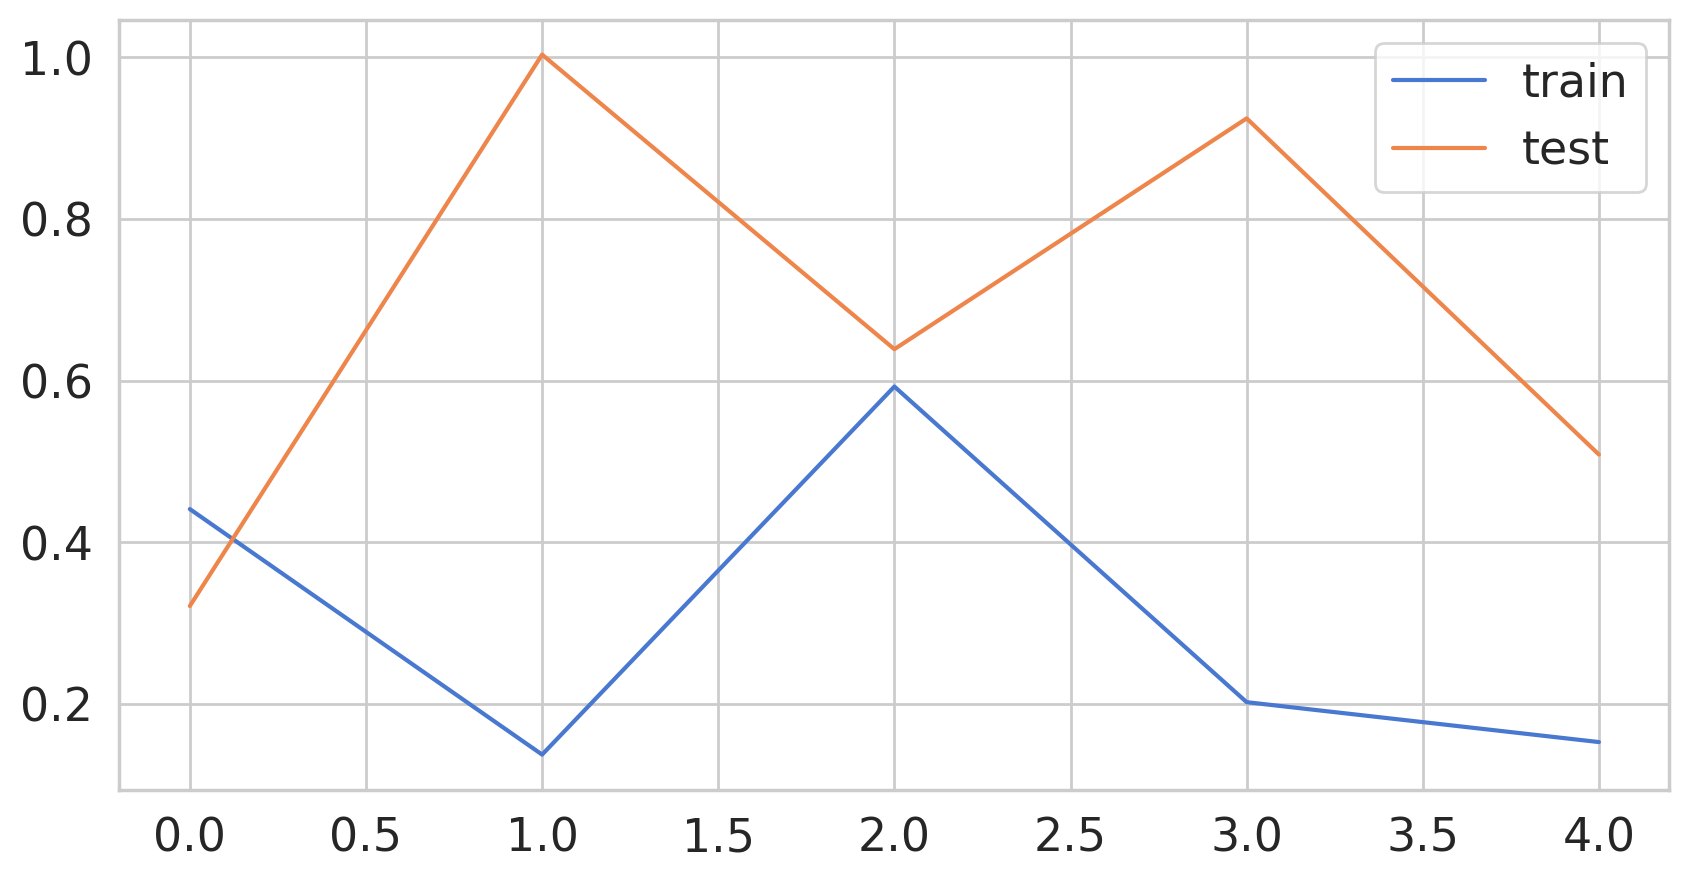

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_cargado['loss'], label='train')
plt.plot(history_cargado['val_loss'], label='test')
plt.legend();

In [ ]:
loss, accuracy, precision, recall, f1_score = modelo_cargado.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1_score}')

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 247s 168ms/step - accuracy: 0.5971 - f1_score: 0.7600 - loss: 0.5419 - precision_2: 0.9005 - recall_2: 0.3464
Test loss: 0.5085037350654602
Test accuracy: 0.6170212626457214
Test precision: 0.9978359937667847
Test recall: 0.41903865337371826
Test f1_score: 0.7938625812530518


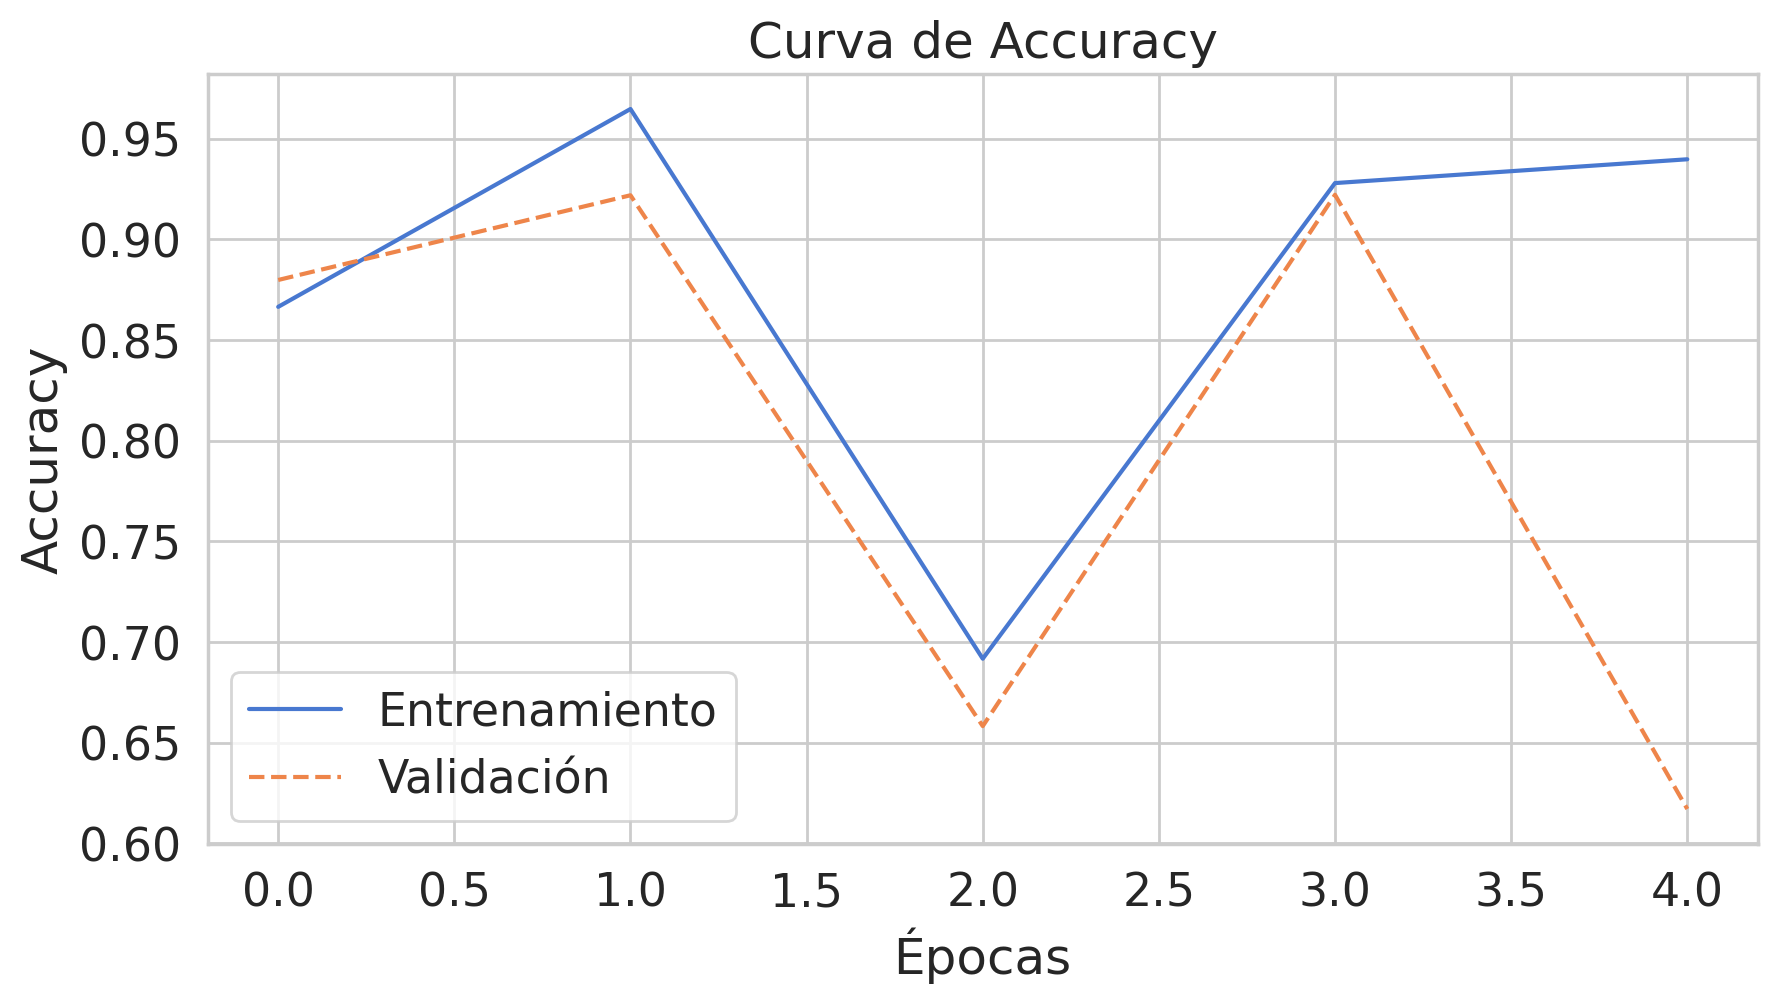

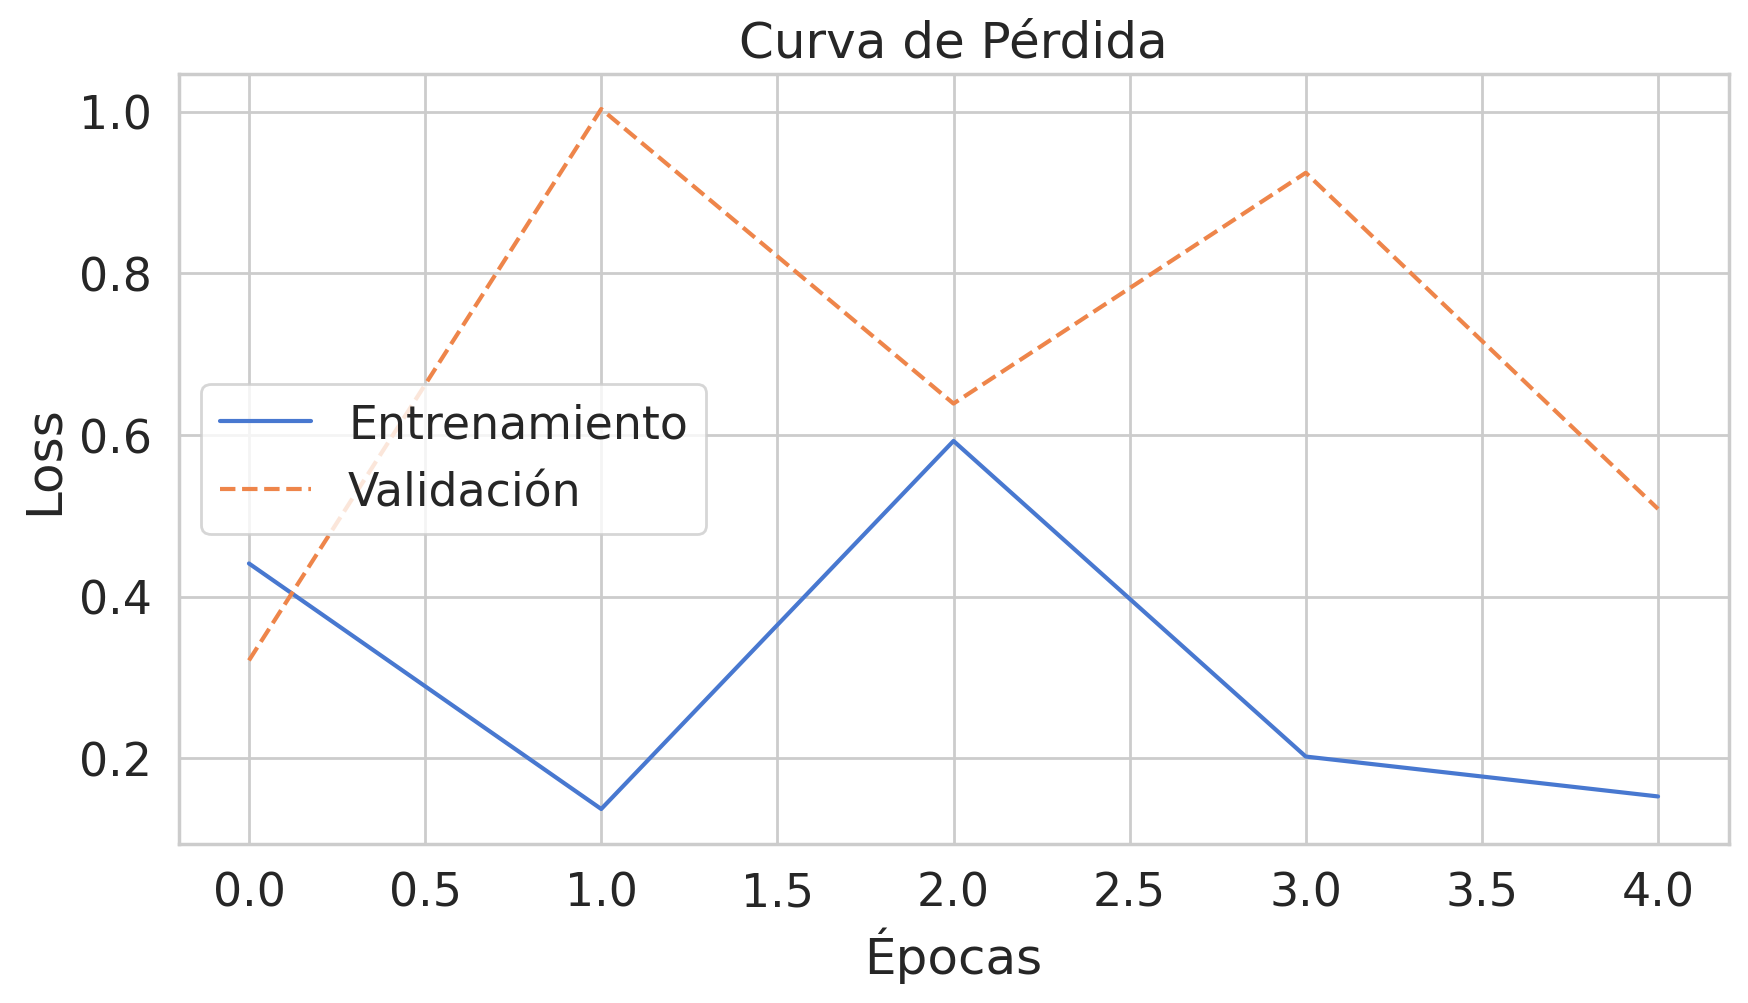

In [ ]:
# Historial de entrenamiento
#history_dict = history.history
history_dict = history_cargado

# 📊 Gráfica de accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict["accuracy"], label="Entrenamiento")
plt.plot(history_dict["val_accuracy"], label="Validación", linestyle="dashed")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.title("Curva de Accuracy")
plt.legend()
plt.show()

# 📊 Gráfica de pérdida (loss)
plt.figure(figsize=(10, 5))
plt.plot(history_dict["loss"], label="Entrenamiento")
plt.plot(history_dict["val_loss"], label="Validación", linestyle="dashed")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Curva de Pérdida")
plt.legend()
plt.show()


In [ ]:
X_train_pred = modelo_cargado.predict(X_train)



3426/3426 ━━━━━━━━━━━━━━━━━━━━ 558s 163ms/step


<ipython-input-118-31ca0369e6a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss, bins=50, kde=True);


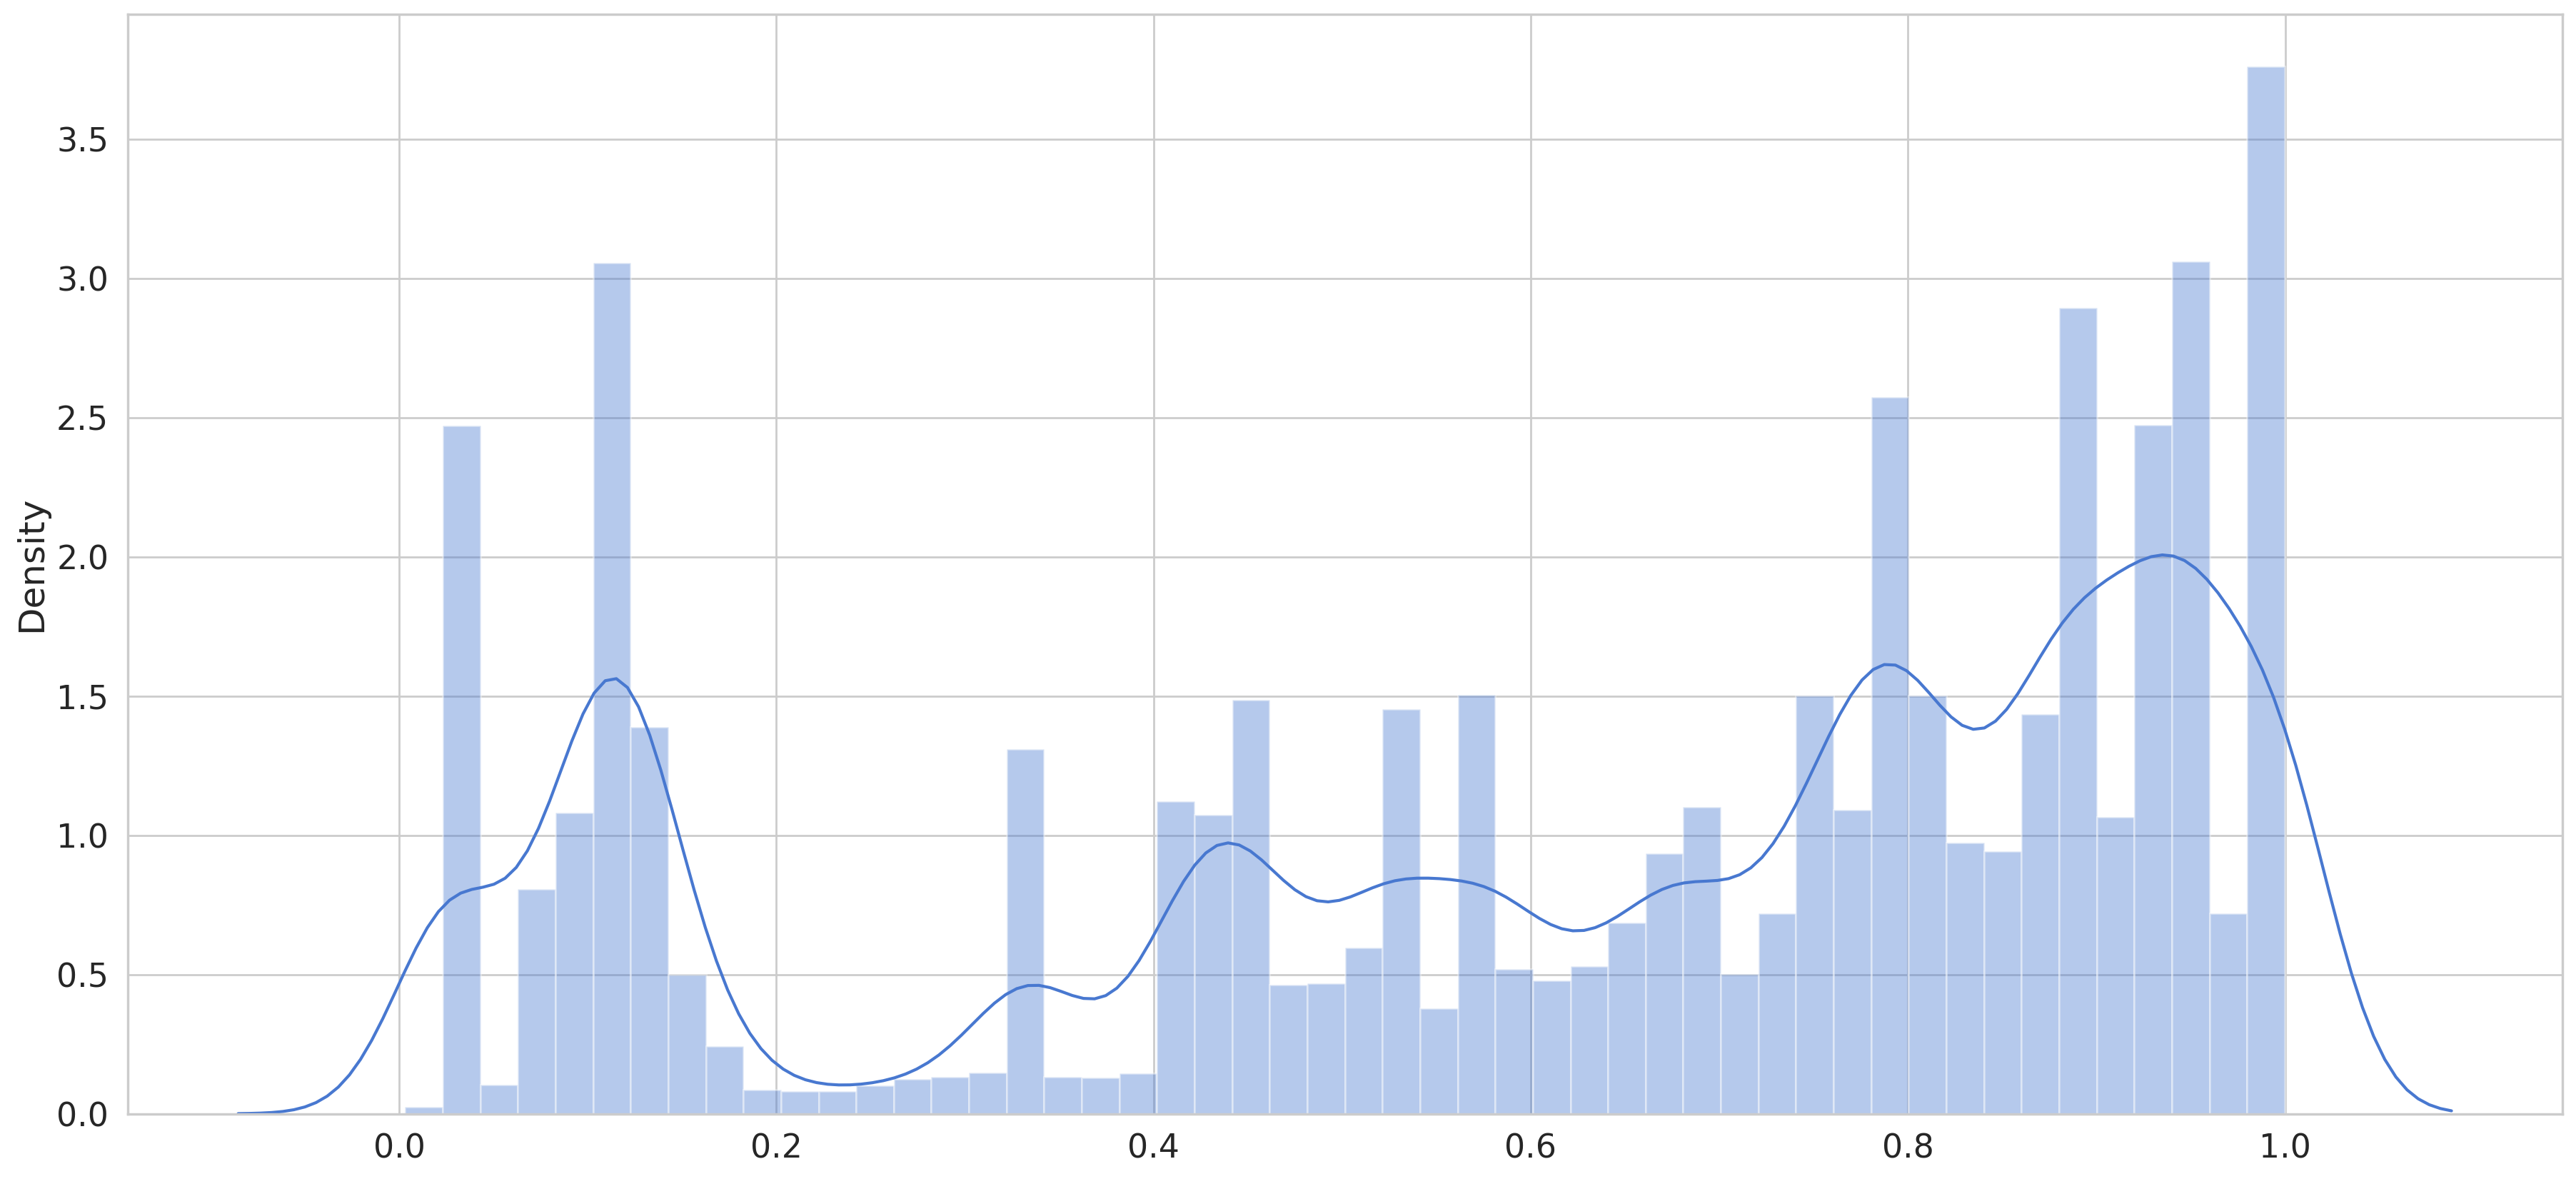

In [ ]:
sns.distplot(test_mae_loss, bins=50, kde=True);